----
# Pejsa Ballistics   
* Calculate trajectory: drop {inches} at range {yards}     
* Only for velocity > 1400 fps   
----

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
# Constants
A = 166
G = 41.68

In [6]:
# Initial Conditions
v0 = 2900
c = 0.484  # .308 M2 bullet
z = 100
s = 1.5
delta = 0   # radians

***
### Initial Retardation Coefficient     
$$f_{0} = c\, A \sqrt{v_{0}}$$  
$f_{0}$ : Retardation coefficient at range=0  {feet}  
$c$ : Ballistic coefficient   
$A = 166$ : Correction for G1 bullet      
$v_{0}$ : Velocity at Range=0  {feet/sec}  

***

In [7]:
f0 = c * A * np.sqrt(v0)
f0

4326.656812644145

### Retardation Coefficient
$$f = f_{0} - 0.4\, r $$
$f_{0}$ : Initial Retardation coefficient  {feet}  
$r$ : Range {yards}   





In [8]:
def f(r):
    return f0 - 0.4 * r
f(z) # test: f at zero range

4286.656812644145

### Residual Velocity
$$v = v_{0} \left(1 - \frac{3}{2} \frac{r}{f_{0}}\right)^{2} $$   
$v_{0}$ : Velocity at Range=0  {feet/sec}   
$v$ : Velocity {fps} at Range = r   
$r$ : Range {yards}   




In [9]:
def v(r):
    return v0 * (1 - 1.5*(r/f0))**2
v(z)  # test: velocity at zero range

2702.4065441307803

### Time
$$t = \frac{2 f_{0}}{v_{0}} \left(\sqrt{\frac{v_{0}}{v}} - 1\right) = \frac { \frac{1}{v_{0}} }{ \frac{1}{3r} - \frac{1}{2f_{0}} } $$    
$t$ : Time {sec} at Range = r, Velocity = v


In [62]:
def t(r):
    #num = 1/v0
    #denom = (1/(3*r)) - (1/(2*f0))
    num = r/v0
    denom = (1/3) - (r/(2*f0))
    return num/denom
t(z)

0.1071635060270982

### Drop
$$d = \left( \frac{ \frac{G}{v_{0}} }{ \frac {1}{r} - \frac{1}{f} } \right)^{2} $$    
$d$ : Drop {in} at Range = r   
$G=41.68$ : Gravitation Constant

In [63]:
def d(r):
    fr = f(r)
    # num = G/v0
    # denom = 1/r - 1/fr
    num = r*(G/v0)
    denom = 1 - r/fr
    return (num/denom)**2
dz = d(z)  # save this value for height calculation
dz

2.1655196597915976

### Height
$$h = -d \, cos(\delta) - s + (d_{z} +s) \frac{r}{z}  $$   
$h$ : Projectile path relative to sightline {in}   
$s$ : Sight height above bore centerline {in}   
$\delta$ : Angle up(+) or down(-) slope   
$z$ : Zero range {yards}   
$d_{z}$ : Drop at Zero range


In [64]:
def h(r):
    dr = d(r)
    return -dr*np.cos(delta) - s + (dz + s) * (r/z)
    # return -(dr+s) + (dz+s)*(r/z)
h(z)   # 

0.0

In [92]:
# range: x-axis
r = np.arange(0,301,10)

In [93]:
height = h(r)

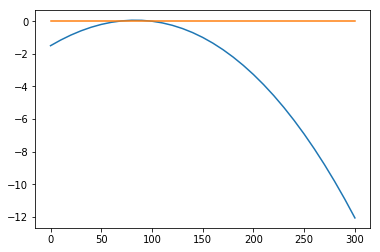

In [94]:
plt.plot(r,height,r,r-r)